In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
X = pd.read_csv('data/fingerprints.csv', index_col = 0)
df = pd.read_csv('data/p2x4_final.csv', index_col = 0)
Y = df['pIC50']
# Feature Selection
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [3]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

In [4]:
# Hyperparameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}


# Hyperparameter grid for ExtraTreesRegressor
param_grid_etr = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter grid for DecisionTreeRegressor
param_grid_dtr = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [5]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 4


In [6]:
# GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=6),
                              param_grid=param_grid_rf, cv=5, n_jobs=N_CORES, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]},
             verbose=2)

In [7]:
# GridSearchCV for XGBRegressor
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=6),
                               param_grid=param_grid_xgb, cv=5, n_jobs=N_CORES, verbose=2)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=6, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.5, 0.8, 1]},
             verbose=2)

In [8]:
# GridSearchCV for ExtraTreesRegressor
grid_search_etr = GridSearchCV(estimator=ExtraTreesRegressor(random_state=6),
                              param_grid=param_grid_etr, cv=5, n_jobs=N_CORES, verbose=2)
grid_search_etr.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=6), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]},
             verbose=2)

In [9]:
# GridSearchCV for DecisionTreeRegressor
grid_search_dtr = GridSearchCV(estimator=DecisionTreeRegressor(random_state=6),
                               param_grid=param_grid_dtr, cv=5, n_jobs=N_CORES, verbose=2)
grid_search_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=6), n_jobs=4,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [10]:
# Selecting the best estimator from each GridSearchCV
best_model_rf = grid_search_rf.best_estimator_
best_model_xgb = grid_search_xgb.best_estimator_
best_model_etr = grid_search_etr.best_estimator_
best_model_dtr = grid_search_dtr.best_estimator_

In [11]:
# Model Evaluation for RandomForestRegressor
y_test_pred_rf = best_model_rf.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

In [12]:
# Model Evaluation for XGBRegressor
y_test_pred_xgb = best_model_xgb.predict(X_test)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)

In [13]:
# Model Evaluation for ExtraTreesRegressor
y_test_pred_etr = best_model_etr.predict(X_test)
mse_test_etr = mean_squared_error(y_test, y_test_pred_etr)

In [14]:
# Model Evaluation for DecisionTreeRegressor
y_test_pred_dtr = best_model_dtr.predict(X_test)
mse_test_dtr = mean_squared_error(y_test, y_test_pred_dtr)

In [15]:
# Printing the results
print(f"RandomForestRegressor - Test Mean Squared Error: {mse_test_rf}")
print(f"XGBRegressor - Test Mean Squared Error: {mse_test_xgb}")
print(f"ExtraTreesRegressor - Test Mean Squared Error: {mse_test_etr}")
print(f"DecisionTreeRegressor - Test Mean Squared Error: {mse_test_dtr}")

print(f"Best RandomForestRegressor: {grid_search_rf.best_params_}")
print(f"Best XGBRegressor: {grid_search_xgb.best_params_}")
print(f"Best ExtraTreesRegressor: {grid_search_etr.best_params_}")
print(f"Best DecisionTreeRegressor: {grid_search_dtr.best_params_}")

RandomForestRegressor - Test Mean Squared Error: 0.12696298323129754
XGBRegressor - Test Mean Squared Error: 0.13832516077102944
ExtraTreesRegressor - Test Mean Squared Error: 0.1324780083007295
DecisionTreeRegressor - Test Mean Squared Error: 0.13442475564232295
Best RandomForestRegressor: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best XGBRegressor: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Best ExtraTreesRegressor: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best DecisionTreeRegressor: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


# Step 1: Predict on Test Set

In [16]:
# Assuming best_model is XGB trained model
y_test_pred = best_model_xgb.predict(X_test)

# Step 2: Calculate Performance Metrics

Since this is a regression problem, you can use metrics such as Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.2381503688905538
Mean Squared Error: 0.13832516077102944
Root Mean Squared Error: 0.37192090660653837
R-squared: 0.9017544127595815


# Step 3: Analyze Residuals

Analyzing the residuals (difference between the predicted and actual values) can provide insights into the behavior of your model.

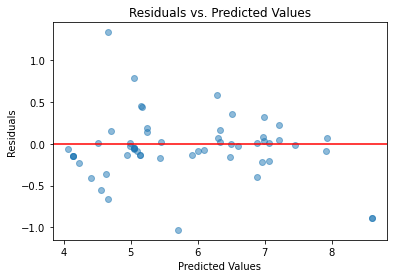

In [18]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Step 4: Compare with Baseline 

It can be helpful to compare your model's performance against a simple baseline model, such as predicting the mean of the target variable for all instances. This gives you a reference point for how much your model has learned.

In [19]:
# Baseline predictions (mean of target variable)
baseline_preds = np.full_like(y_test, np.mean(y_train))

# Baseline Mean Squared Error
baseline_mse = mean_squared_error(y_test, baseline_preds)

print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Model Mean Squared Error: {mse}")

Baseline Mean Squared Error: 1.4313491541001528
Model Mean Squared Error: 0.13832516077102944


# Using the best model to Maybridge Data

# Step 1: Prepare the data(Load and Preprocess)

In [20]:
maybridge_data = pd.read_csv("maybridge/Maybridge.csv")
maybridge_data

,SMILES,Code
0,Fc1ccc(C(c2ccc(F)cc2)N2CCNCC2)cc1,AC10018
1,CSc1nc(N)nc2nc[nH]c12,AC12157
2,CN(C)Cc1c[nH]c2ccc(OCc3ccccc3)cc12,AC13917
3,O=C(O)c1ccc(Br)o1,AC27191
4,NC(Cc1c[nH]c2ccc(Br)cc12)C(=O)O,AC29806
...,...,...
51768,CCO/C(C)=N/Oc1ccc([N+](=O)[O-])cc1[N+](=O)[O-],S14814
51769,O=C1c2ccccc2C(=O)N1Oc1ccc([N+](=O)[O-])c([N+](...,S14839
51770,O=[N+]([O-])c1ccc2nc(-c3ccccc3)c(-c3ccccc3)nc2c1,S14896
51771,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1/C=C/c1ccccc1,SPB05721


In [21]:
descriptors = pd.read_csv('maybridge/out.csv', index_col = 0)
descriptors.shape

(51773, 881)

In [22]:
descriptors = selection.transform(descriptors)
descriptors.shape

(51773, 155)

In [25]:
# Step 3: Make Predictions
predicted_pic50 = best_model_xgb.predict(descriptors)

In [26]:
# Step 4: Analyze Results
# Append predictions to the Maybridge data
maybridge_data["predicted_pic50"] = predicted_pic50

In [27]:
maybridge_data

,SMILES,Code,predicted_pic50
0,Fc1ccc(C(c2ccc(F)cc2)N2CCNCC2)cc1,AC10018,4.827250
1,CSc1nc(N)nc2nc[nH]c12,AC12157,4.955899
2,CN(C)Cc1c[nH]c2ccc(OCc3ccccc3)cc12,AC13917,5.151771
3,O=C(O)c1ccc(Br)o1,AC27191,4.952400
4,NC(Cc1c[nH]c2ccc(Br)cc12)C(=O)O,AC29806,6.393386
...,...,...,...
51768,CCO/C(C)=N/Oc1ccc([N+](=O)[O-])cc1[N+](=O)[O-],S14814,4.692730
51769,O=C1c2ccccc2C(=O)N1Oc1ccc([N+](=O)[O-])c([N+](...,S14839,4.976388
51770,O=[N+]([O-])c1ccc2nc(-c3ccccc3)c(-c3ccccc3)nc2c1,S14896,5.627023
51771,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1/C=C/c1ccccc1,SPB05721,4.915679


In [28]:
# Identify potent inhibitors
threshold = 6 # Define a threshold for pic50 values 
potent_inhibitors = maybridge_data[maybridge_data["predicted_pic50"] >= threshold]

In [29]:
potent_inhibitors

,SMILES,Code,predicted_pic50
4,NC(Cc1c[nH]c2ccc(Br)cc12)C(=O)O,AC29806,6.393386
6,NC(Cc1c[nH]c2ccc(F)cc12)C(=O)O,AC42043,6.393386
14,O=C(O)C1Cc2cc(O)ccc2CN1,AC30194,6.061110
15,NC(Cc1c[nH]c2cc(F)ccc12)C(=O)O,AC34762,6.393386
30,O=C(O)C1Cc2cc(O)ccc2CN1,AC17979,6.061110
...,...,...,...
51599,Cc1ccc(SC(C)C(=O)Nc2ccc(C(C)(C)C)cc2)cc1,S14657,6.459469
51600,CC(Sc1ccc(Cl)cc1)C(=O)Nc1ccc(C(C)(C)C)cc1,S14683,6.518332
51639,O=C1NC(=S)S/C1=C/c1ccc(Sc2ccc(Cl)cc2)c([N+](=O...,BTB00374,6.172292
51640,O=C1NC(=S)S/C1=C/c1cc([N+](=O)[O-])ccc1Sc1ccc(...,BTB00389,6.172292


In [30]:
sorted_potent_inhibitors = potent_inhibitors.sort_values(by=['predicted_pic50'], ascending=[False])
sorted_potent_inhibitors

,SMILES,Code,predicted_pic50
41084,CC(C)(C)c1ccc2[nH]c(/C(=C\c3ccc(F)cc3)NC(=O)c3...,S02343,7.599439
10084,N#Cc1ccc(-c2c(NC(=O)NS(=O)(=O)c3ccccc3Cl)oc(-c...,BTB05800,7.265222
17571,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)Nc1cccc(S(N)(=O)=...,BTB09803,7.249482
15839,O=C(Nc1nnc(C2CC2)s1)c1cc(-c2ccc(Cl)cc2)oc1C(F)...,BTB08768,7.239823
40703,Cc1ccc(/C=C(\NC(=O)c2ccccc2)c2nc3c(C)c(C)c(C)c...,RH00884,7.215047
...,...,...,...
45365,COC(=O)CCCCCCCC(=O)Nc1cc(C)on1,S05490,6.000356
49487,Cc1cc(-c2nc(C)c(C(=O)NNC(=O)Nc3ccc(Cl)cc3Cl)s2...,RJC03774,6.000344
45194,N/C(=N\OC(=O)c1cc(-c2ccc(Cl)cc2)oc1C(F)(F)F)c1...,RJC00145,6.000295
50474,O=C(NNC(=O)c1sccc1OCc1ncc(C(F)(F)F)cc1Cl)c1ccc...,RJF01712,6.000032


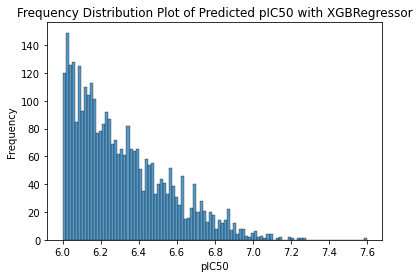

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=potent_inhibitors, x='predicted_pic50', kde=False, bins=100)

# Set the title and labels for the plot
plt.title('Frequency Distribution Plot of Predicted pIC50 with XGBRegressor')
plt.xlabel('pIC50')
plt.ylabel('Frequency')


#plt.savefig('figures/pIC50_frequency_plot.png')
# Show the plot
plt.show()

In [ ]:
# Save the potent inhibitors to a CSV file
potent_inhibitors.to_csv("potent_p2x4_inhibitors.csv", index=False)